In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as tfk
import matplotlib.pyplot as plt

from scod import SCOD
from distribution import GaussianFixedDiagVar
from priors import IndependentPrior, ScalarPrior, PerVarPrior

%matplotlib inline

In [2]:
# dataset
def regression_1d_data(N=100, means=[-2, 2], fn=np.sin, linspace=None, seed=4242):
    np.random.seed(seed)
    if linspace is not None:
        Xs = np.linspace(linspace[0], linspace[1], N)[:, np.newaxis]
    else:
        Xs = np.concatenate([m + 2*np.random.rand(N) - 1 for m in means])[:, np.newaxis]
        np.random.shuffle(Xs)
    Ys = fn(((Xs + 3) / 2)**2)
    Ys = Ys + np.random.normal(scale=0.05, size=Ys.shape)
    
    return Xs, Ys

def regression_1d_dataset(N=200, means=[-1.5, 1.5], fn=np.sin, linspace=None, seed=4242):
    Xs, Ys = regression_1d_data(N, means, fn, linspace, seed)
    
    return tf.data.Dataset.from_tensor_slices((Xs.astype(np.float32), Ys.astype(np.float32)))   
    
train_ds = regression_1d_dataset(seed=4242)
val_ds = regression_1d_dataset(seed=4243)
calib_ds = regression_1d_dataset(N=400, linspace=[-5, 5])

2022-01-31 21:55:07.279697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-31 21:55:07.308439: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-31 21:55:07.308650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-31 21:55:07.309080: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
# regression model
model = tfk.Sequential([
    tfk.layers.Dense(128, activation="relu"),
    tfk.layers.Dense(128, activation="relu"),
    tfk.layers.Dense(128, activation="relu"),
    tfk.layers.Dense(1),
])
model.compile("adam", tfk.losses.mse)

In [10]:
# train model
model.fit(train_ds.batch(64), epochs=200, validation_data=val_ds)

Epoch 1/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 2/200
7/7 [==============================] - 0s 44ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 3/200
7/7 [==============================] - 0s 42ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 4/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 5/200
7/7 [==============================] - 0s 39ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 6/200
7/7 [==============================] - 0s 39ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 7/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 8/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 9/200
7/7 [==============================] - 0s 41ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 10/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 11/200
7/7 [=

Epoch 84/200
7/7 [==============================] - 0s 37ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 85/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 86/200
7/7 [==============================] - 0s 39ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 87/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch 88/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 89/200
7/7 [==============================] - 0s 36ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 90/200
7/7 [==============================] - 0s 39ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 91/200
7/7 [==============================] - 0s 36ms/step - loss: 0.0028 - val_loss: 0.0039
Epoch 92/200
7/7 [==============================] - 0s 37ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 93/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 94/2

7/7 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 167/200
7/7 [==============================] - 0s 37ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 168/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 169/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 170/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 171/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 172/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 173/200
7/7 [==============================] - 0s 39ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 174/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 175/200
7/7 [==============================] - 0s 38ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 176/200


In [11]:
scod_model = SCOD(
    model=model,
    output_dist=GaussianFixedDiagVar(),
    num_samples=train_ds.cardinality(),
    num_eigs=40,
    prior_class=PerVarPrior,
)
scod_model.process_dataset(train_ds.batch(32))

  0%|                                                                                                                                                    | 0/13 [00:00<?, ?it/s]

Consider rewriting this model with the Functional API.


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 12/13 [00:01<00:00,  7.08it/s]

Consider rewriting this model with the Functional API.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  5.56it/s]


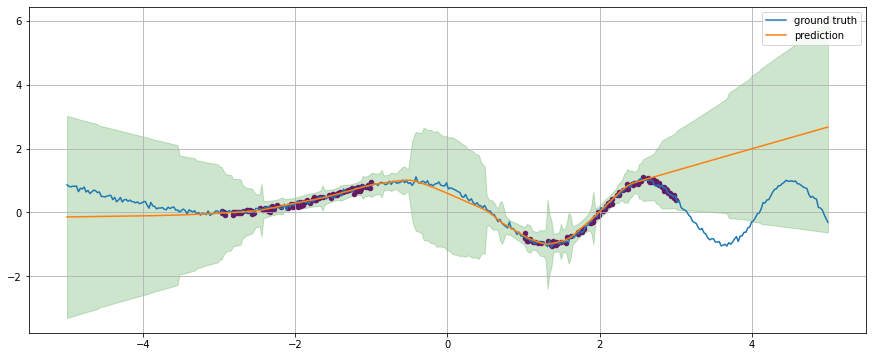

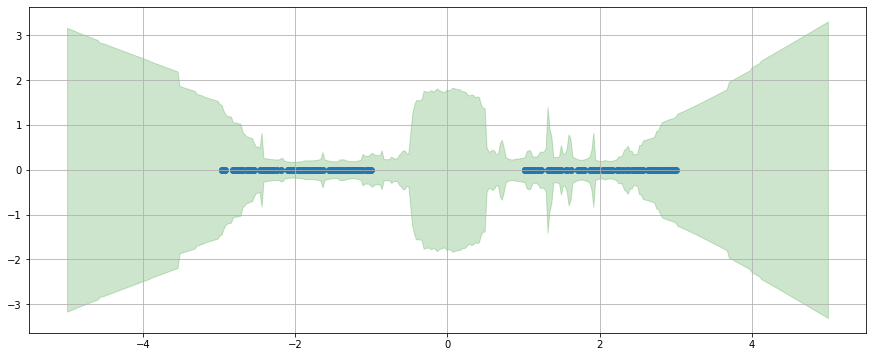

In [12]:
X, Y, Y_hat, Sigma = [], [], [], []
for data in calib_ds.batch(128):
    inputs, labels = data
    y, S = scod_model(inputs)
    X.append(inputs[:, 0])
    Y.append(labels[:, 0])
    Y_hat.append(y[:, 0])
    Sigma.append(S[:, 0, 0])
X = np.concatenate(X)
Y = np.concatenate(Y)
Y_hat = np.concatenate(Y_hat)
Sigma = np.sqrt(np.concatenate(Sigma))

X_train, Y_train = regression_1d_data(seed=4242)
plt.figure(figsize=(15,6))
plt.scatter(X_train.flatten(), Y_train.flatten(), color="purple", s=20)
plt.plot(X, Y, label="ground truth")
plt.plot(X, Y_hat, label="prediction")
plt.fill_between(X, Y_hat + Sigma, Y_hat - Sigma, color="g", alpha=0.2)
plt.grid()
plt.legend()

plt.figure(figsize=(15, 6))
plt.fill_between(X, Sigma, -Sigma, color="g", alpha=0.2)
plt.scatter(X_train.flatten(), np.zeros_like(X_train.flatten()))
plt.grid()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:38<00:00, 15.75it/s, Loss=0.178, lr=0.001]


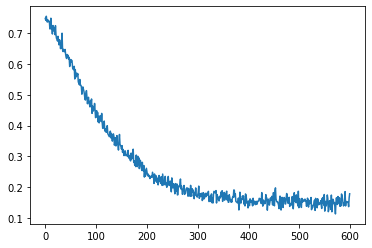

In [13]:
losses = scod_model.calibrate_prior(
    dataset=calib_ds.shuffle(calib_ds.cardinality()).batch(32),
    sigma_scale=0.8,
    num_epochs=600, 
    learning_rate=1e-3,
)
plt.plot(losses)

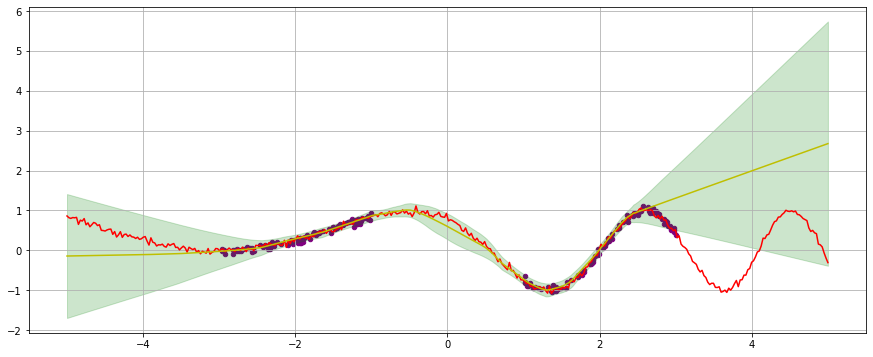

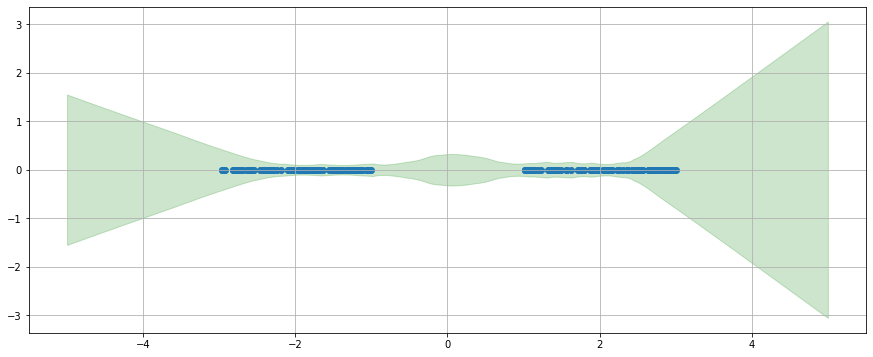

In [14]:
X, Y, Y_hat, Sigma = [], [], [], []
for data in calib_ds.batch(128):
    inputs, labels = data
    y, S = scod_model(inputs)
    X.append(inputs[:, 0])
    Y.append(labels[:, 0])
    Y_hat.append(y[:, 0])
    Sigma.append(S[:, 0, 0])
X = np.concatenate(X)
Y = np.concatenate(Y)
Y_hat = np.concatenate(Y_hat)
Sigma = np.sqrt(np.concatenate(Sigma))

X_train, Y_train = regression_1d_data(seed=4242)
plt.figure(figsize=(15,6))
plt.scatter(X_train.flatten(), Y_train.flatten(), color="purple", s=20)
plt.plot(X, Y, 'r-')
plt.plot(X, Y_hat, 'y-')
plt.fill_between(X, Y_hat + Sigma, Y_hat - Sigma, color="g", alpha=0.2)
plt.grid()

plt.figure(figsize=(15, 6))
plt.fill_between(X, Sigma, -Sigma, color="g", alpha=0.2)
plt.scatter(X_train.flatten(), np.zeros_like(X_train.flatten()))
plt.grid()

In [15]:
scod_model.prior.log_priors

<tf.Variable 'log_priors:0' shape=(8,) dtype=float32, numpy=
array([-4.245898  , -4.2335615 , -4.028576  , -4.1653633 , -3.6123269 ,
       -3.8218539 ,  0.54621977,  3.1333873 ], dtype=float32)>